In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [16]:
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv").astype('float32')

In [5]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X = data.drop('0',axis = 1)
y = data['0']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [9]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

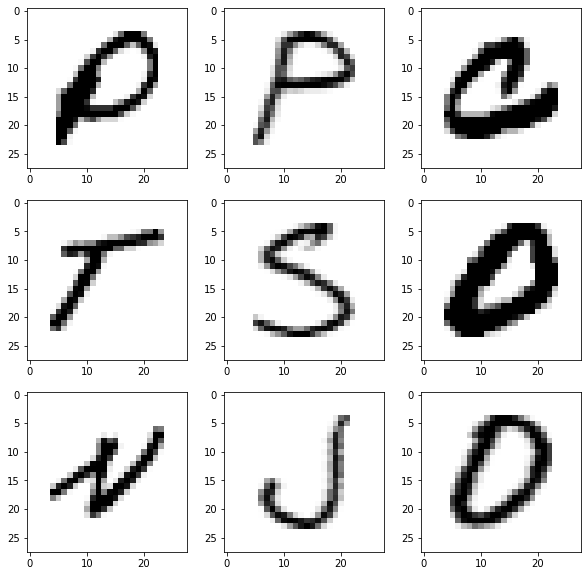

In [17]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    
    axes[i].imshow(train_x[i], cmap="Greys")
plt.show()

In [18]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)


New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [19]:
import tensorflow as tf

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


## Training the Model 

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Reshape,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping 

In [24]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [26]:
## optimizers 
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [27]:
early = EarlyStopping(patience =2,restore_best_weights =True)
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_yOHE,epochs=4,callbacks =[early])

2023-01-25 07:21:47.352838: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4
9312/9312 [==============================] - 172s 18ms/step - loss: 0.1771 - accuracy: 0.9517
Epoch 2/4
9312/9312 [==============================] - 172s 18ms/step - loss: 0.0754 - accuracy: 0.9792
Epoch 3/4
9312/9312 [==============================] - 172s 19ms/step - loss: 0.0639 - accuracy: 0.9823
Epoch 4/4
9312/9312 [==============================] - 177s 19ms/step - loss: 0.0580 - accuracy: 0.9845


<AxesSubplot:>

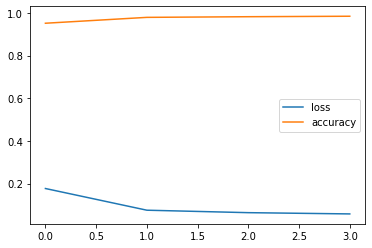

In [32]:
pd.DataFrame(model.history.history).plot()

## Predictions 

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
model.evaluate(test_X,test_yOHE)

2328/2328 [==============================] - 18s 8ms/step - loss: 0.0630 - accuracy: 0.9840


[0.06297984719276428, 0.9839844107627869]

In [52]:
pred = model.predict(test_X)

In [95]:
predict2 = [i.argmax() for i in pred]

In [87]:
predict =[i.round() for i in pred]

In [89]:
print(classification_report(predict,test_yOHE))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2887
           1       0.98      0.98      0.98      1766
           2       0.98      0.99      0.98      4728
           3       0.94      0.96      0.95      1925
           4       0.98      0.99      0.99      2269
           5       0.94      0.99      0.96       218
           6       0.98      0.98      0.98      1108
           7       0.98      0.97      0.97      1447
           8       0.93      0.99      0.96       212
           9       0.97      0.96      0.97      1741
          10       0.97      0.96      0.97      1154
          11       0.97      0.98      0.98      2313
          12       0.99      0.99      0.99      2490
          13       0.99      0.98      0.98      3778
          14       0.99      0.99      0.99     11653
          15       0.99      0.99      0.99      3821
          16       0.98      0.97      0.97      1094
          17       0.96    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
predict2 = np.array(predict2)

## RESULTS

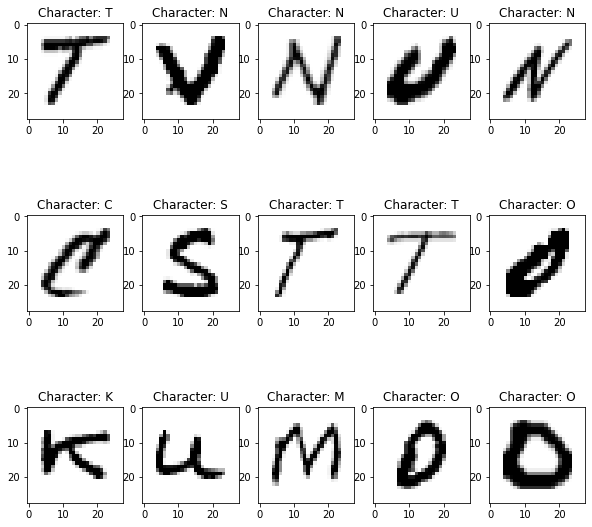

In [118]:
fig, ax = plt.subplots(3,5, figsize = (10,10))
axes = ax.flatten()
for i in range(15):
    
    
    axes[i].imshow(test_x[i], cmap="Greys")
    axes[i].set_title("Character: " + str(word_dict[predict2[i]]))
plt.show()